<h1>Проект Курса</h1>

<h2>Подключение Библиотек</h2>

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import poisson
from datetime import datetime

%matplotlib inline
from math import ceil
from ast import literal_eval
from sqlalchemy import create_engine
import missingno as msno
import altair as alt

<h2>Анализ, очистка и подготовка данных к работе</h2>

<h3> Подключение и осмотр данных </h3>

* Подключение файлов

In [2]:
df1 = pd.read_csv('periods_test.csv', sep=',')
df2 = pd.read_csv('test.csv', sep=',')

* Осмотр файлов

In [3]:
df1.head(5)

,item_id,activation_date,date_from,date_to
0,f3a62a713278,2017-03-13,2017-04-12,2017-04-12
1,045ec5dabe07,2017-04-03,2017-04-12,2017-04-18
2,801d15e12e25,2017-04-17,2017-04-17,2017-04-18
3,0a981789d4af,2017-03-23,2017-04-12,2017-04-18
4,cab2ed403350,2017-03-28,2017-04-12,2017-04-18


In [4]:
df2.head(5)

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1
0,6544e41a8817,dbe73ad6e4b5,Волгоградская область,Волгоград,Личные вещи,Детская одежда и обувь,Для мальчиков,Обувь,25,Отдам бесплатно,На ангарском,NaN,66,2017-04-18,Private,a8b57acb5ab304f9c331ac7a074219aed4d349d8aef386...,2020.0
1,65b9484d670f,2e11806abe57,Свердловская область,Нижняя Тура,Хобби и отдых,Велосипеды,Дорожные,NaN,NaN,Продам велосипед,"Продам велосипед KAMA F200,в нормальном состо...",3000.0,4,2017-04-16,Private,NaN,NaN
2,8bab230b2ecd,0b850bbebb10,Новосибирская область,Бердск,Бытовая электроника,Аудио и видео,Телевизоры и проекторы,NaN,NaN,BBK,Продам новый телевизор BBK 32 диагональ смарт...,15000.0,15,2017-04-17,Private,8c361112cb049745ef2d1b0ae73594fc5c107286b0c942...,2960.0
3,8e348601fefc,5f1d5c3ce0da,Саратовская область,Саратов,Для дома и дачи,Бытовая техника,Для кухни,Вытяжки,NaN,Вытяжка Jetair 60,"Продам новую вытяжку в упаковке,с документами....",4500.0,70,2017-04-17,Private,NaN,NaN
4,8bd2fe400b89,23e2d97bfc7f,Оренбургская область,Бузулук,Личные вещи,Товары для детей и игрушки,Детские коляски,NaN,NaN,Коляска зима-лето,Продам отличную коляску. б/у 1 год. все вопрос...,4900.0,15,2017-04-15,Private,bc3cf6deef10840fc302e38eb48fa7748aa1e28d534f8f...,1002.0


* осмотр типов данных

In [5]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13724922 entries, 0 to 13724921
Data columns (total 4 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   item_id          object
 1   activation_date  object
 2   date_from        object
 3   date_to          object
dtypes: object(4)
memory usage: 418.9+ MB
None


In [6]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508438 entries, 0 to 508437
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   item_id               508438 non-null  object 
 1   user_id               508438 non-null  object 
 2   region                508438 non-null  object 
 3   city                  508438 non-null  object 
 4   parent_category_name  508438 non-null  object 
 5   category_name         508438 non-null  object 
 6   param_1               485528 non-null  object 
 7   param_2               275209 non-null  object 
 8   param_3               202107 non-null  object 
 9   title                 508438 non-null  object 
 10  description           508438 non-null  object 
 11  price                 477853 non-null  float64
 12  item_seq_number       508438 non-null  int64  
 13  activation_date       508438 non-null  object 
 14  user_type             508438 non-null  object 
 15  

>##### Описание столбцов
>* item_id - уникальных id пользователя 
>* user_id - имя пользователя 
>* region - регион
>* city - город
>* parent_category_name - главная категория объявления
>* category_name - категория объявления
>* param_1 - 1-я подкатегория 
>* param_2 - 2-я подкатегория
>* param_3 - 3-я подкатегория
>* title - заголовок объявления
>* description - описание объявления
>* price - цена
>* activation_date - дата активации
>* user_type - тип пользователям, 3 уникальных типа (Private, Company, Shop)
>* image - id изображения
>* image_top_1 - имя изображения

In [7]:
df1.head(5).transpose() 

,0,1,2,3,4
item_id,f3a62a713278,045ec5dabe07,801d15e12e25,0a981789d4af,cab2ed403350
activation_date,2017-03-13,2017-04-03,2017-04-17,2017-03-23,2017-03-28
date_from,2017-04-12,2017-04-12,2017-04-17,2017-04-12,2017-04-12
date_to,2017-04-12,2017-04-18,2017-04-18,2017-04-18,2017-04-18


In [8]:
df2.head(5).transpose()

,0,1,2,3,4
item_id,6544e41a8817,65b9484d670f,8bab230b2ecd,8e348601fefc,8bd2fe400b89
user_id,dbe73ad6e4b5,2e11806abe57,0b850bbebb10,5f1d5c3ce0da,23e2d97bfc7f
region,Волгоградская область,Свердловская область,Новосибирская область,Саратовская область,Оренбургская область
city,Волгоград,Нижняя Тура,Бердск,Саратов,Бузулук
parent_category_name,Личные вещи,Хобби и отдых,Бытовая электроника,Для дома и дачи,Личные вещи
category_name,Детская одежда и обувь,Велосипеды,Аудио и видео,Бытовая техника,Товары для детей и игрушки
param_1,Для мальчиков,Дорожные,Телевизоры и проекторы,Для кухни,Детские коляски
param_2,Обувь,NaN,NaN,Вытяжки,NaN
param_3,25,NaN,NaN,NaN,NaN
title,Отдам бесплатно,Продам велосипед,BBK,Вытяжка Jetair 60,Коляска зима-лето


* сводная статистика по столбцам с числовыми данными

In [9]:
df2.describe() 

,price,item_seq_number,image_top_1
count,4.778530e+05,508438.000000,465829.000000
mean,2.798189e+05,825.132150,1297.959228
std,5.364218e+06,5646.868618,961.065300
min,0.000000e+00,1.000000,0.000000
25%,5.000000e+02,8.000000,467.000000
50%,1.500000e+03,30.000000,1132.000000
75%,8.600000e+03,94.000000,2218.000000
max,3.000060e+09,205064.000000,3066.000000


>##### Вызов df.describe с параметром (include='all') выводит сводку статистических данных для всех столбцов в вашем датафрейме, включая и категориальные переменные. По умолчанию в сводке фигурируют только числовые данные. 

>###### Вот что вы получите в сводке:

>- count: Количество непустых значений в каждом столбце.
>- unique: Количество уникальных значений в каждом столбце. Это применимо только к категориальным столбцам.
>- top: Самое часто встречающееся значение в каждом столбце. Это применимо только к категориальным столбцам.
>- freq: Количество раз, которое самое частое значение встречается в каждом столбце. Это применимо только к категориальным столбцам.
>- mean: Среднее значение числовых данных в каждом столбце.
>- std: Стандартное отклонение числовых данных в каждом столбце.
>- min: Минимальное значение в каждом столбце.
>- 25% (quantile): Значение, ниже которого попадает 25% данных.
>- 50% (quantile): Значение, ниже которого попадает 50% данных (медиана).
>- 75% (quantile): Значение, ниже которого попадает 75% данных.
>- max: Максимальное значение в каждом столбце.

In [10]:
df2.describe(include='all')

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1
count,508438,508438,508438,508438,508438,508438,485528,275209,202107,508438,508438,4.778530e+05,508438.000000,508438,508438,465829,465829.000000
unique,508438,306069,28,1644,9,47,361,255,973,298039,485209,NaN,NaN,9,3,465829,NaN
top,6544e41a8817,abcdd1ca1a5c,Краснодарский край,Екатеринбург,Личные вещи,"Одежда, обувь, аксессуары",Женская одежда,Обувь,Вторичка,Платье,В хорошем состоянии,NaN,NaN,2017-04-12,Private,a8b57acb5ab304f9c331ac7a074219aed4d349d8aef386...,NaN
freq,1,496,45098,22391,216577,84896,66642,48776,18307,4673,918,NaN,NaN,81824,358259,1,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.798189e+05,825.132150,NaN,NaN,NaN,1297.959228
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.364218e+06,5646.868618,NaN,NaN,NaN,961.065300
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,1.000000,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000e+02,8.000000,NaN,NaN,NaN,467.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.500000e+03,30.000000,NaN,NaN,NaN,1132.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.600000e+03,94.000000,NaN,NaN,NaN,2218.000000


##### Вывод статистических данных по столбцам
>* item_id уникальных объявлений 508438
>* user_id общее кол-во пользователей 306069
>* region представлены объявления из 28 регионов
>* city опубликованы объявления из 1644 городов
>* parent_category_name всего объявления опубликованы в 9 разделах
>* category_name 47 категорий объявлений
>* param_1 1-я подкатегория 361 вариант
>* param_2 2-я подкатегория 255 вариант
>* param_3 3-я подкатегория 973 вариант
>* title заголовок. 298039 уникальных заголовка
>* description Описание. 485209 уникальных описания
>* price Цена. 477853 объявлений с ценой. Без цены 30585
>* activation_date Дата активации
>* user_type тип пользователям, 3 уникальных типа
>* image всего 465829 изображений

 * Заполним Nan значения - значением unknown

In [11]:
df2.fillna(value={'param_1': 'unknown', 'param_2': 'unknown', 'param_3': 'unknown'}, inplace=True)

> столбцы param_1, param_2, param_3 - являются подкатегорями и не несут кретической информации для анализа

<h3>Работа со столбцами 'дата активации'</h3>

* Меняем тип данных столбцов с датами

In [12]:
df1['activation_date'] = pd.to_datetime(df1['activation_date'])
df1['date_from'] = pd.to_datetime(df1['date_from'])
df1['date_to'] = pd.to_datetime(df1['date_to'])
df2['activation_date'] = pd.to_datetime(df2['activation_date'])

In [13]:
print(df2['activation_date'].head())

0   2017-04-18
1   2017-04-16
2   2017-04-17
3   2017-04-17
4   2017-04-15
Name: activation_date, dtype: datetime64[ns]


* Смотрим в какие дни были объявления

In [14]:
date_stats = df2['activation_date'].value_counts().sort_index(axis=0)
date_stats

activation_date
2017-04-12    81824
2017-04-13    77176
2017-04-14    70366
2017-04-15    58793
2017-04-16    58909
2017-04-17    80191
2017-04-18    81114
2017-04-19       64
2017-04-20        1
Name: count, dtype: int64

In [15]:
date_weekday = date_stats.index.to_series().dt.day_name()
date_weekday

activation_date
2017-04-12    Wednesday
2017-04-13     Thursday
2017-04-14       Friday
2017-04-15     Saturday
2017-04-16       Sunday
2017-04-17       Monday
2017-04-18      Tuesday
2017-04-19    Wednesday
2017-04-20     Thursday
Name: activation_date, dtype: object

> Из полученных данных, видим что у нас есть данные с 12 по 20 апреля 2017 года, т.к. данные за 19 и 20 число слишком малы, будем рассматривать даныне за 7 дней с 12 по 18 апреля

* Строим график по количеству актиаций в день

In [16]:
df2_filtered = df2['activation_date'].value_counts()
df2_filtered = df2_filtered[df2_filtered > 65]

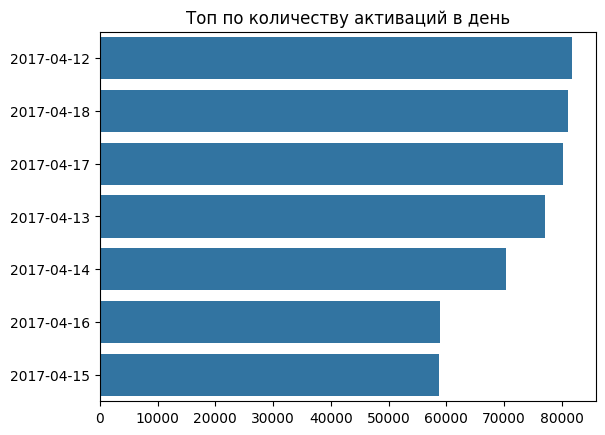

In [17]:
order = df2_filtered.index
plt.title('Топ по количеству активаций в день')
ax = sns.countplot(y=df2['activation_date'], data=df2, order=order)
plt.xlabel('')
plt.ylabel('')

plt.show()

> топ активаций выходит на среду, четвер и пятницу. Считаю что большинство людей руководствуются тем что под конец неделю + выходные люди будут чаще заходить на авито что бы посмотреть интересующие их объявления, чем в начале или середины недели - поэтому и выкладывают объявления начиная со среды-четверга

<h3>Работа со столбцом 'region'</h3>

* Посмотрим уникальные значения в столбце 'region'

In [18]:
unique_region_list = list(df2['region'].unique())
print(unique_region_list)

['Волгоградская область', 'Свердловская область', 'Новосибирская область', 'Саратовская область', 'Оренбургская область', 'Ростовская область', 'Калининградская область', 'Пермский край', 'Краснодарский край', 'Башкортостан', 'Самарская область', 'Иркутская область', 'Ставропольский край', 'Нижегородская область', 'Тульская область', 'Омская область', 'Алтайский край', 'Татарстан', 'Кемеровская область', 'Челябинская область', 'Ханты-Мансийский АО', 'Ярославская область', 'Тюменская область', 'Белгородская область', 'Красноярский край', 'Воронежская область', 'Владимирская область', 'Удмуртия']


* Посмотрим топ 10 регионов по количеству объявлений

In [19]:
top_region = df2['region'].value_counts().head(10)
top_region.columns = ['Регион', 'Кол-во объявлений']
print(top_region)

region
Краснодарский край       45098
Свердловская область     33408
Татарстан                30035
Челябинская область      28839
Ростовская область       26672
Самарская область        26507
Башкортостан             24921
Нижегородская область    24886
Пермский край            22560
Новосибирская область    21900
Name: count, dtype: int64


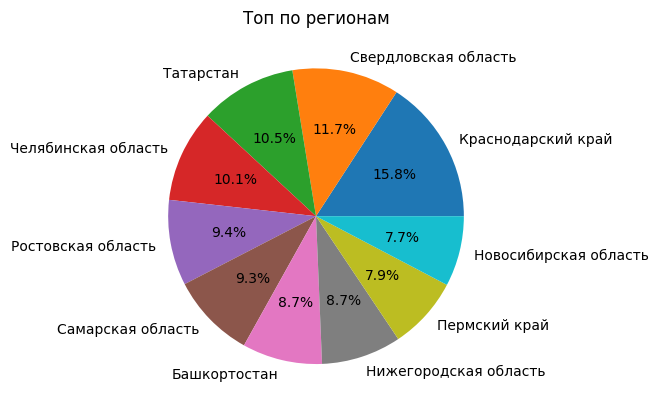

In [20]:
plt.title("Топ по регионам")
plt.pie(top_region,labels=top_region.index,radius=1, autopct='%.1f%%')
plt.show()

> Краснодарский край сильно опережает другие облати по количеству объявлений, так же в топ 3 входят - на втором месте Свердловская области и на третьем месте Татарстан

* Статистика объявлений по городам

In [21]:
top_city = df2['city'].value_counts().head(10)
top_city.columns = ['Город', 'Количество объявлений']
print(top_city)

city
Екатеринбург       22391
Краснодар          20888
Новосибирск        19885
Челябинск          18064
Нижний Новгород    17796
Казань             17391
Пермь              16943
Ростов-на-Дону     15696
Самара             15523
Уфа                14755
Name: count, dtype: int64


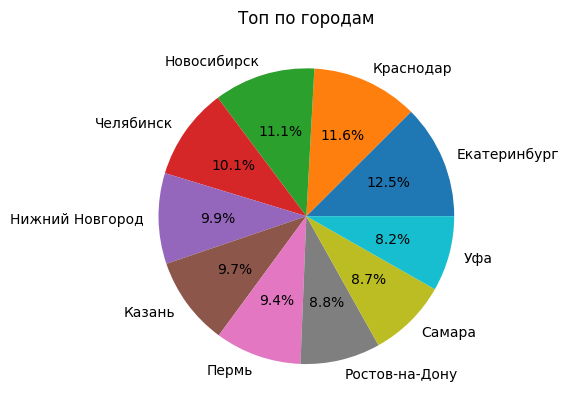

In [22]:
plt.title("Топ по городам")
plt.pie(top_city,labels=top_city.index,radius=1, autopct='%.1f%%')
plt.show()

> Из анализа объявлений мы наблюдаем что большая часть объявлений находится в городе Екатеринбург, Краснодар и Новосибирск

<h3>Работал со столбцом category </h3>

* Посмотрим топ объявлений по категориям

In [23]:
parent_category_name = df2['parent_category_name'].value_counts().head(10)
parent_category_name

parent_category_name
Личные вещи            216577
Для дома и дачи         64910
Бытовая электроника     58282
Недвижимость            57387
Хобби и отдых           31271
Транспорт               29953
Услуги                  23619
Животные                19976
Для бизнеса              6463
Name: count, dtype: int64

<Axes: title={'center': 'Топ по категориям'}, xlabel='count', ylabel='parent_category_name'>

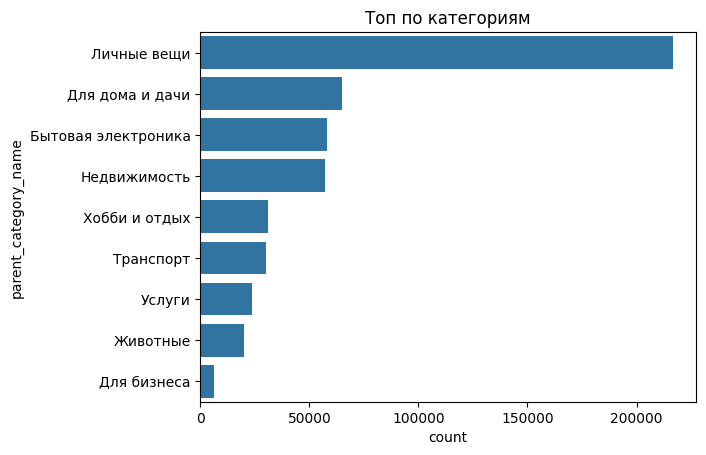

In [24]:
plt.title("Топ по категориям")
sns.countplot(y = df2['parent_category_name'], order = parent_category_name.index)

> Из анализа объявлений, мы видим что люди чаще продают свои личные вещи на платформе

In [25]:
category_name = df2['category_name'].value_counts().head(10)
print(category_name)

category_name
Одежда, обувь, аксессуары     84896
Детская одежда и обувь        81654
Товары для детей и игрушки    35533
Квартиры                      30345
Предложение услуг             23619
Автомобили                    22607
Мебель и интерьер             22182
Телефоны                      22131
Ремонт и строительство        22062
Бытовая техника               11497
Name: count, dtype: int64


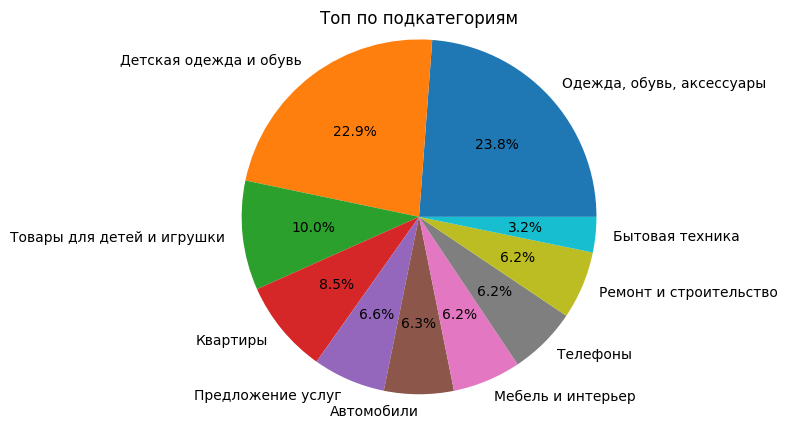

In [26]:
plt.title("Топ по подкатегориям")
plt.pie(category_name,labels=category_name.index,radius=1.2, autopct='%.1f%%')
plt.show()

> Из анализа объявлений, мы видим что люди чаще продают одежду и обвуь разных возврастов

<h3>Работал со столбцом user_type </h3>

In [27]:
counts_1= df2['user_type'].value_counts()
counts_1

user_type
Private    358259
Company    119949
Shop        30230
Name: count, dtype: int64

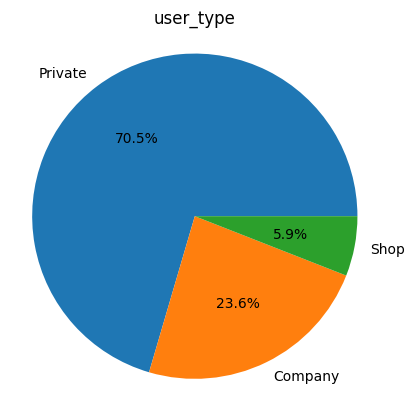

In [28]:
plt.title("user_type")
plt.pie(counts_1,labels=counts_1.index,radius=1.1, autopct='%.1f%%')
plt.show()

> Из анализа видно что большая часть объявлений принадлежит частным продавцам, чем компаниям и магазинам

<h2>Анализ пропусков, выбросов и несоответствий в данных</h2>

<h3>Анализ пропусков</h3>

* Осмотр на наличение пропусков

In [29]:
missing_values_df1 = df1.isnull().sum()
missing_values_df2 = df2.isnull().sum()

print("Пропуски в df1:\n", missing_values_df1[missing_values_df1 > 0])
print("Пропуски в df2:\n", missing_values_df2[missing_values_df2 > 0])

Пропуски в df1:
 activation_date    5043
dtype: int64
Пропуски в df2:
 price          30585
image          42609
image_top_1    42609
dtype: int64


* Осмотр на наличение пропусков в процентном соотношение

In [30]:
percent_missing_values_df2 = df2.isnull().mean()
print("Процент пропусков в df2:\n", percent_missing_values_df2[percent_missing_values_df2 > 0])

Процент пропусков в df2:
 price          0.060155
image          0.083804
image_top_1    0.083804
dtype: float64


<h3>Анализ дубликатов</h3>

> Осмотр на наличие дубликатов

In [31]:
for col in df2.columns:
    print(f"Количество дубликатов в столбце {col}: {df2[col].duplicated().sum()}")

Количество дубликатов в столбце item_id: 0
Количество дубликатов в столбце user_id: 202369
Количество дубликатов в столбце region: 508410
Количество дубликатов в столбце city: 506794
Количество дубликатов в столбце parent_category_name: 508429
Количество дубликатов в столбце category_name: 508391
Количество дубликатов в столбце param_1: 508076
Количество дубликатов в столбце param_2: 508182
Количество дубликатов в столбце param_3: 507464
Количество дубликатов в столбце title: 210399
Количество дубликатов в столбце description: 23229
Количество дубликатов в столбце price: 499064
Количество дубликатов в столбце item_seq_number: 492548
Количество дубликатов в столбце activation_date: 508429
Количество дубликатов в столбце user_type: 508435
Количество дубликатов в столбце image: 42608
Количество дубликатов в столбце image_top_1: 505390


> Наблюдаем очень большое количесто дубликатов, можно проверить действительно ли дубликаты идентичны

In [32]:
df2[df2.duplicated(keep=False)] 

,item_id,user_id,region,city,parent_category_name,category_name,param_1,param_2,param_3,title,description,price,item_seq_number,activation_date,user_type,image,image_top_1


 > метод не показывает никаких дубликатов, это означает, что в нашем DataFrame нет полных дубликатов, все строки уникальны.

<h3>Анализ выбросов</h3>

* посмотрим на выбросы, в данном DataFrame мы можем посмотреть в основном на столбце price 

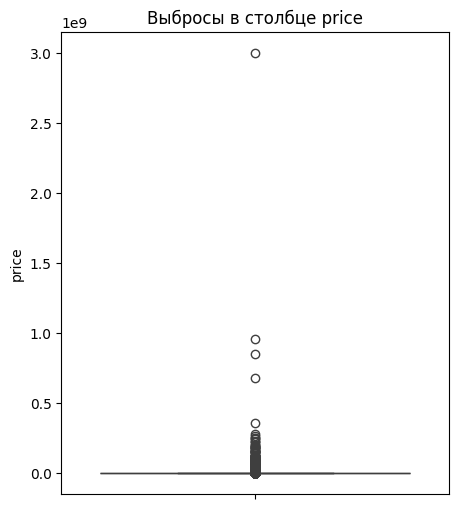

In [33]:
plt.figure(figsize=(5, 6))
sns.boxplot(data=df2['price']) 
plt.title('Выбросы в столбце price')
plt.show()

> из приведённого графика видими что, в основном объявления имеют небольшую стоимость товаров

<h3>Анализ несоответствий в данных</h3>

In [34]:
print(df1.dtypes)

item_id                    object
activation_date    datetime64[ns]
date_from          datetime64[ns]
date_to            datetime64[ns]
dtype: object


In [35]:
print(df2.dtypes)

item_id                         object
user_id                         object
region                          object
city                            object
parent_category_name            object
category_name                   object
param_1                         object
param_2                         object
param_3                         object
title                           object
description                     object
price                          float64
item_seq_number                  int64
activation_date         datetime64[ns]
user_type                       object
image                           object
image_top_1                    float64
dtype: object


In [77]:
print(df2.isnull().sum())

item_id                     0
user_id                     0
region                      0
city                        0
parent_category_name        0
category_name               0
param_1                     0
param_2                     0
param_3                     0
title                       0
description                 0
price                   30585
item_seq_number             0
activation_date             0
user_type                   0
image                   42609
image_top_1             42609
demand                  30585
dtype: int64


> Несоответствий в данных не обнаруженно

<h2>Проведём анализ взаимосвязей</h2>

<h3>Рассмотрим взаимосвязи между ценой и спросом</h3>

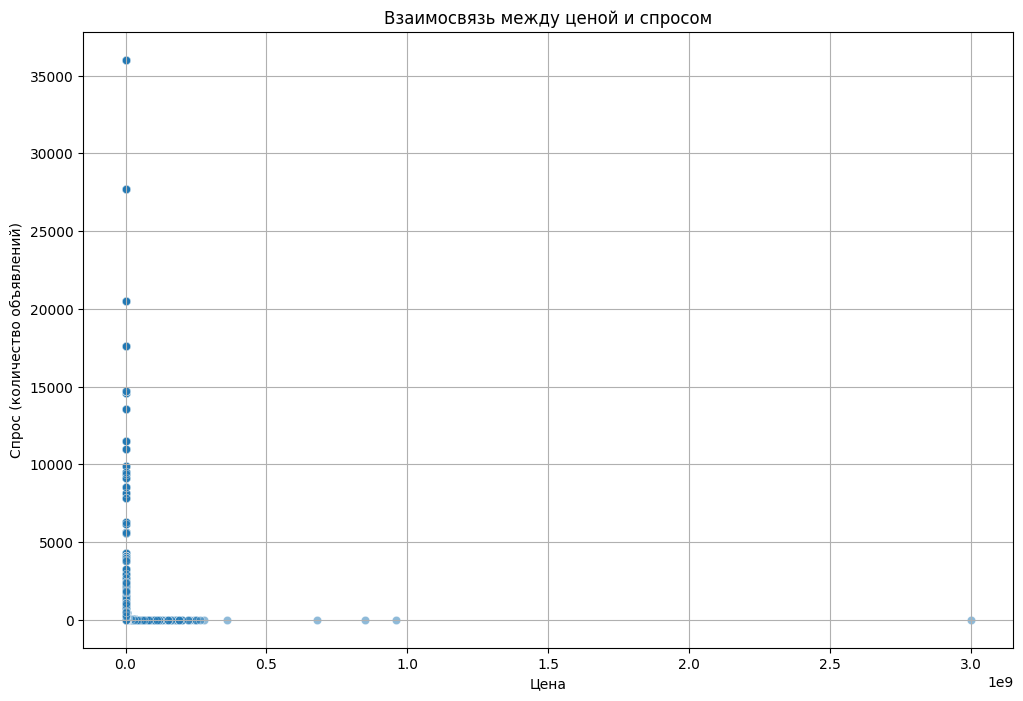

In [74]:
df2['demand'] = df2.groupby('price')['item_id'].transform('count')
plt.figure(figsize=(12, 8))
sns.scatterplot(x='price', y='demand', data=df2, alpha=0.5)
plt.title('Взаимосвязь между ценой и спросом')
plt.xlabel('Цена')
plt.ylabel('Спрос (количество объявлений)')
plt.grid()
plt.show()

> Из графика можно сделать вывод, что объявления с низкой стоимостью очень сильно преобладает, объявления с большой стоимостью встречаются довольно редко

<h3>Рассмотрим взаимосвязь между категорией и ценой</h3>

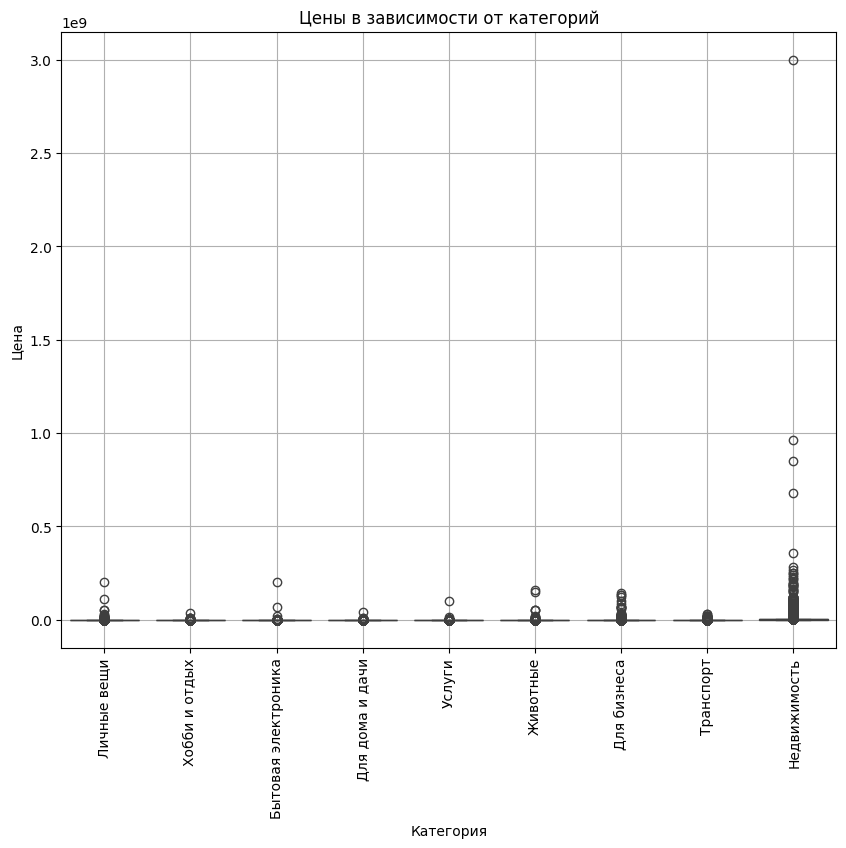

In [72]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='parent_category_name', y='price', data=df2)
plt.title('Цены в зависимости от категорий')
plt.xlabel('Категория')
plt.ylabel('Цена')
plt.xticks(rotation=90)
plt.grid()
plt.show()

> Исходя из графика самые дорогие объявления находятся в категории недвижимость и в категории для бизнеса.

<h3>Рассмотрим взаимосвязь между регионом и спросом</h3>

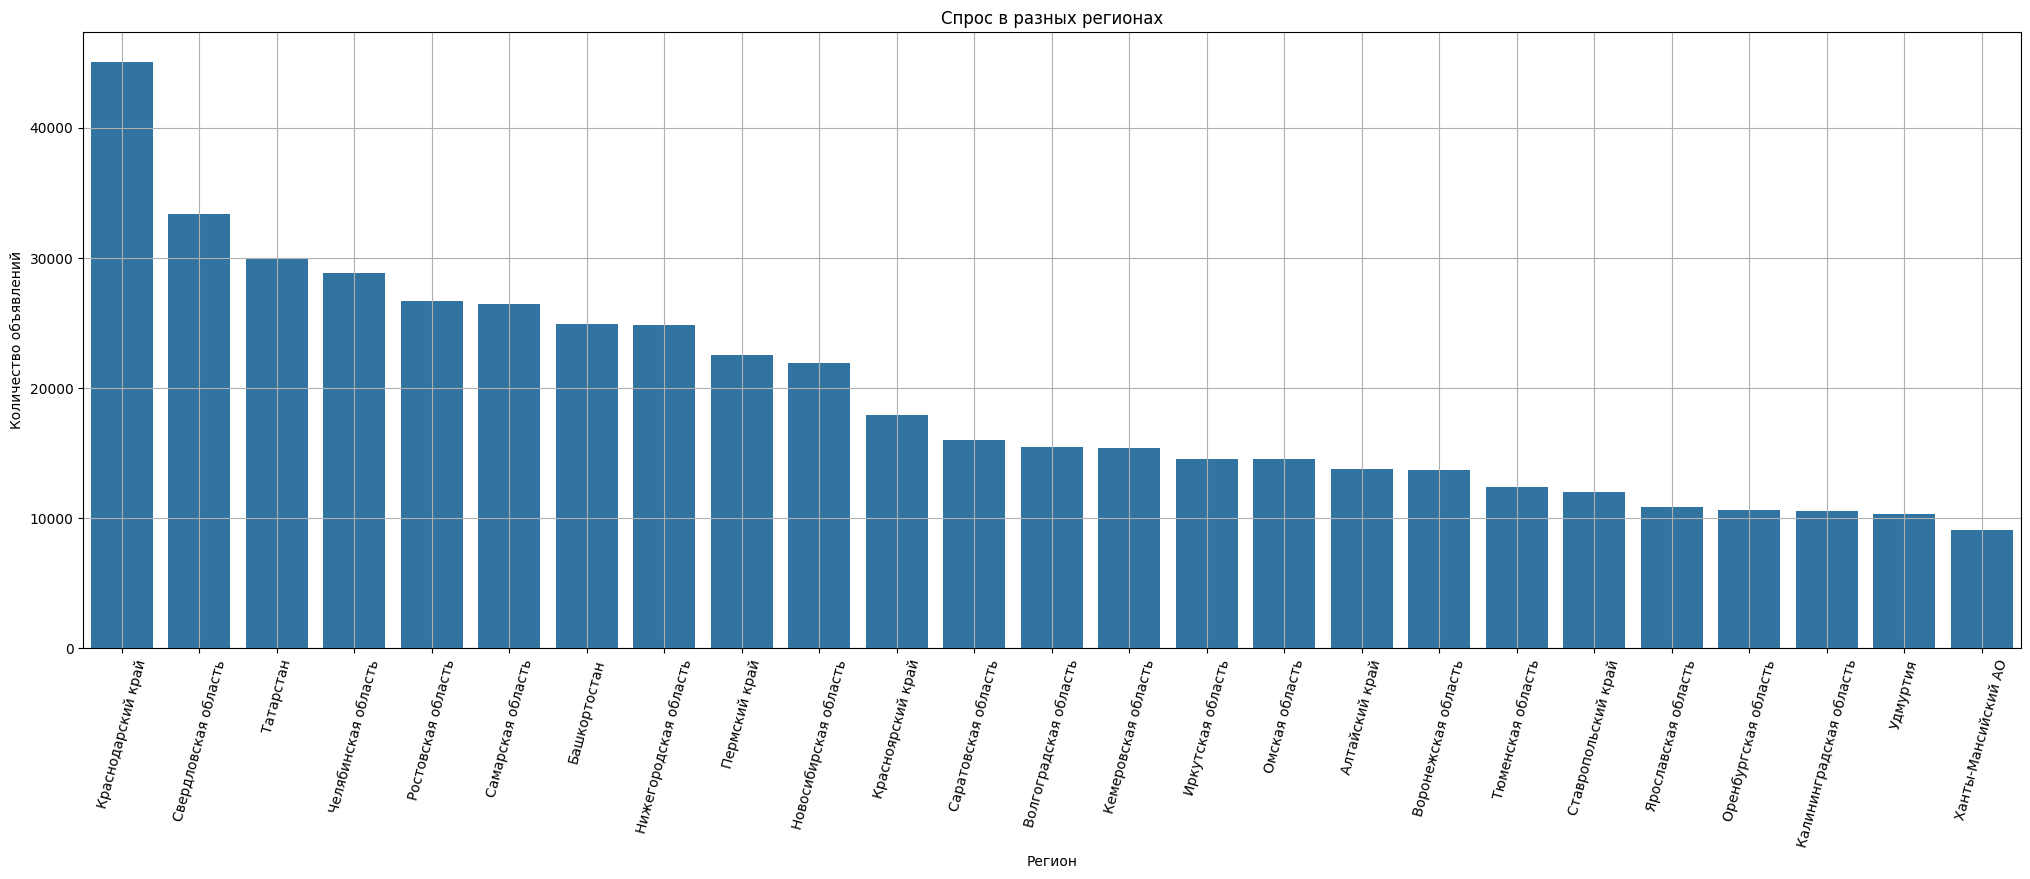

In [65]:
region_demand = df2['region'].value_counts().head(25)
plt.figure(figsize=(25, 8))
sns.barplot(x=region_demand.index, y=region_demand.values)
plt.title('Спрос в разных регионах')
plt.xlabel('Регион')
plt.ylabel('Количество объявлений')
plt.xticks(rotation=75)
plt.grid()
plt.show()

> Из графика видно что, что Краснодарский край имеет наибольшее количество объявлений, свердловская и татарстан входят в топ 3. из данного графика можно сделать заключения что, чем ближе округ находится к центру России, к ЦФО, тем больше объявлений создано в областях - соответственно и во всём округе, таких как Южный федеральный округ и Приволжский федеральный округ. Обсласти которые находятся территориально дальше от ЦФО имеют в основном наименьшее количество объявлений, такие как Сибирский и Дальневосточный федеральные округа.

<h3>Взаимосвязь между типом пользователя и активностью</h3>

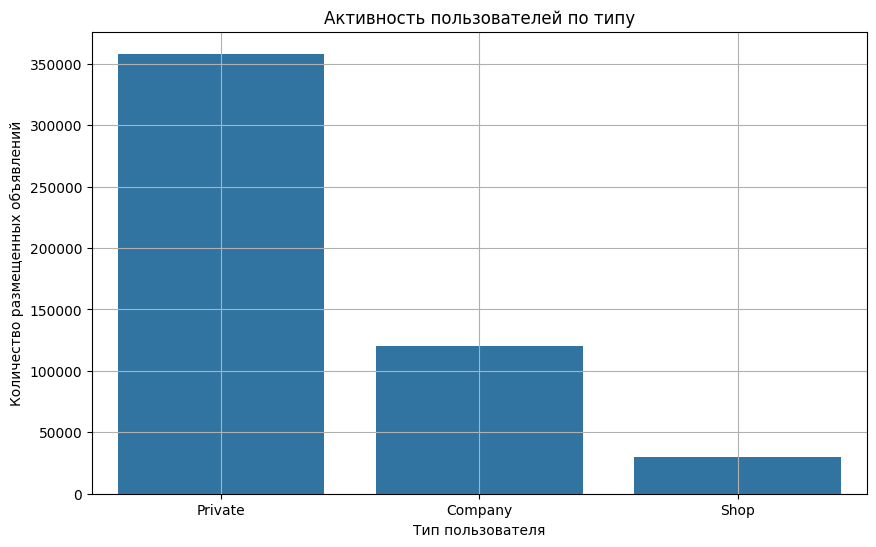

In [40]:
user_activity = df2['user_type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=user_activity.index, y=user_activity.values)
plt.title('Активность пользователей по типу')
plt.xlabel('Тип пользователя')
plt.ylabel('Количество размещенных объявлений')
plt.grid()
plt.show()

> из графика видно что больше всего объявлений приходтся на пользователей со статусом Private, частные лица. Наименьшую активность имеют пользователи статус Shop - магазины.